In [2]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Function to read NDVI data from a GeoTIFF file
def read_ndvi(file_path):
    with rasterio.open(file_path) as src:
        ndvi = src.read(1)  # Read the first band
    return ndvi

In [7]:
ndvi_img_1 = '../Datasets/Landsat_CBE_2020_to_2021_2_months/NDVI_Coimbatore_20200101_20200301.tif'
ndvi_1 = read_ndvi(ndvi_img_1)

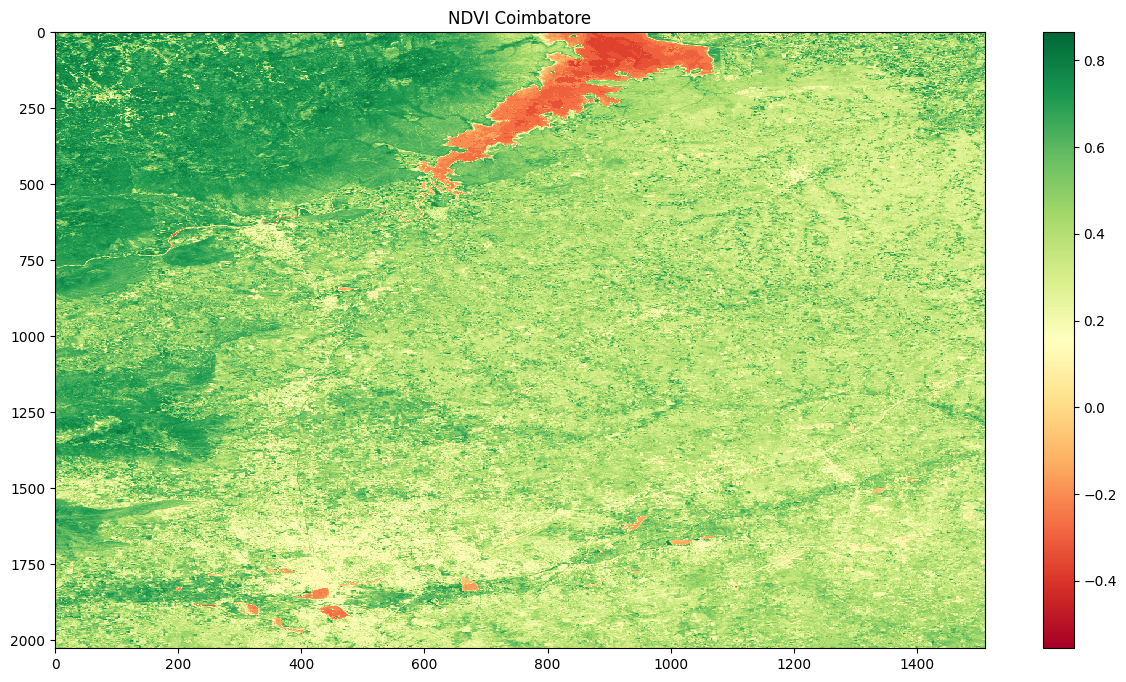

In [13]:
plt.figure(figsize= (15,8))
plt.imshow(ndvi_1, interpolation='nearest', aspect='auto',cmap = 'RdYlGn')
plt.colorbar()
plt.title('NDVI Coimbatore')
plt.show()

In [14]:
ndvi_1.mean()

0.4266683

In [10]:
ndvi_img_2 = '../Datasets/Landsat_CBE_2020_to_2021_2_months/NDVI_Coimbatore_20200301_20200430.tif'
ndvi_2 = read_ndvi(ndvi_img_2)


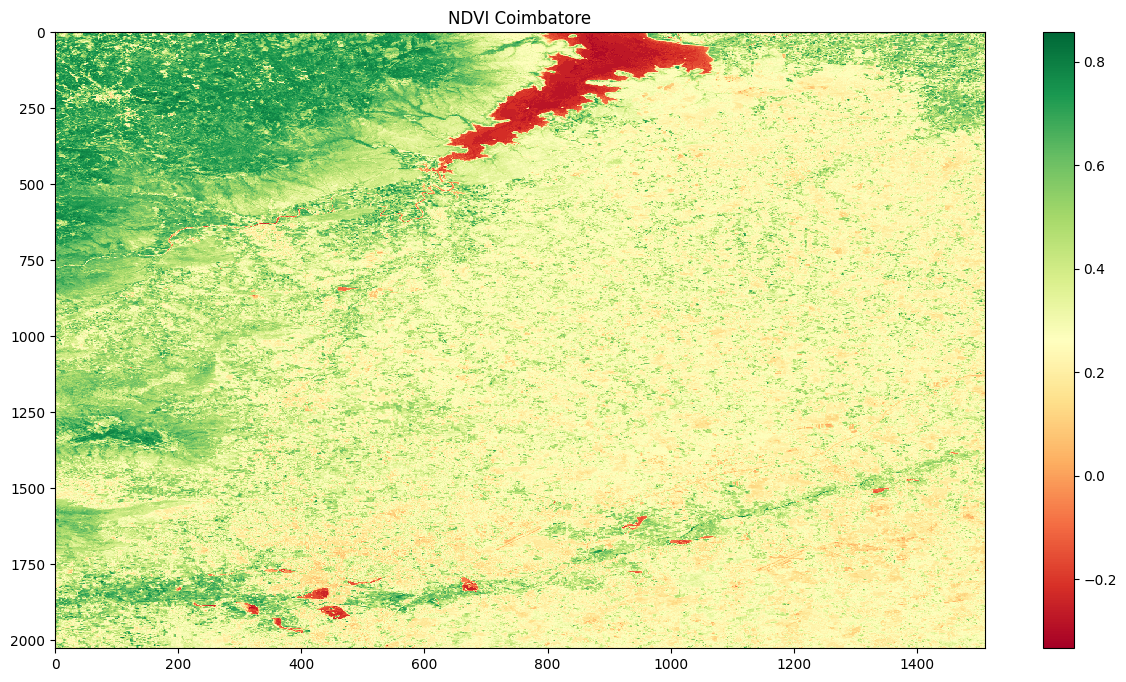

In [12]:
plt.figure(figsize= (15,8))
plt.imshow(ndvi_2, interpolation='nearest', aspect='auto',cmap = 'RdYlGn')
plt.colorbar()
plt.title('NDVI Coimbatore')
plt.show()

In [15]:
ndvi_2.mean()

0.34671828

In [16]:


# Flatten the NDVI arrays and stack them for clustering
ndvi_stack = np.dstack((ndvi_1, ndvi_2))
ndvi_flat = ndvi_stack.reshape(-1, 2)


In [20]:
# Apply K-Means clustering
n_clusters = 5  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(ndvi_flat)
labels = kmeans.labels_
silhouette_avg = silhouette_score(ndvi_flat, labels)

# Reshape labels to the original NDVI shape for visualization
labels_reshaped = labels.reshape(ndvi_1.shape)

/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

In [ ]:

# Plot the clustering result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('NDVI Image 1')
plt.imshow(ndvi_1, cmap='viridis')
plt.colorbar()

plt.subplot(1, 2, 2)
